In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('ggplot')

covid_url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(covid_url, parse_dates = ['Date'])
df['Total Cases'] = df[['Confirmed','Recovered','Deaths']].sum(axis = 1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


In [36]:
world_covid = df.groupby(['Date']).sum()
world_covid.head()

,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2020-01-22,557,30,17,604
2020-01-23,655,32,18,705
2020-01-24,941,39,26,1006
2020-01-25,1433,42,42,1517
2020-01-26,2118,56,56,2230


<function matplotlib.pyplot.show(close=None, block=None)>

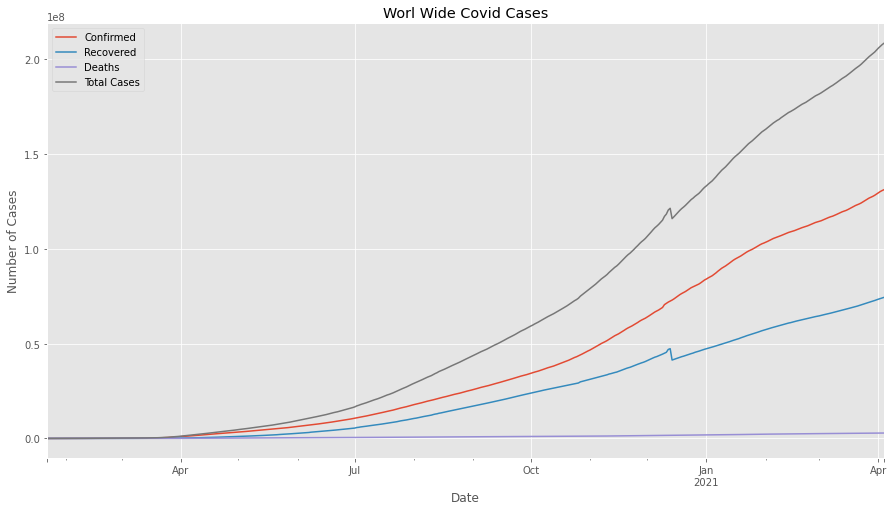

In [37]:
#World wide covid19 cases
w = world_covid.plot(figsize = (15,8))
w.set_xlabel('Date')
w.set_ylabel('Number of Cases')
w.set_title('Worl Wide Covid Cases')

plt.show

In [38]:
us_df = df[df['Country'] == 'US'].groupby('Date').sum()

In [39]:
au_df = df[df['Country'] == 'Australia'].groupby('Date').sum()

In [40]:
au_df.tail()

,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2021-03-31,29322,23012,909,53243
2021-04-01,29333,23014,909,53256
2021-04-02,29341,23025,909,53275
2021-04-03,29348,23027,909,53284
2021-04-04,29357,23032,909,53298


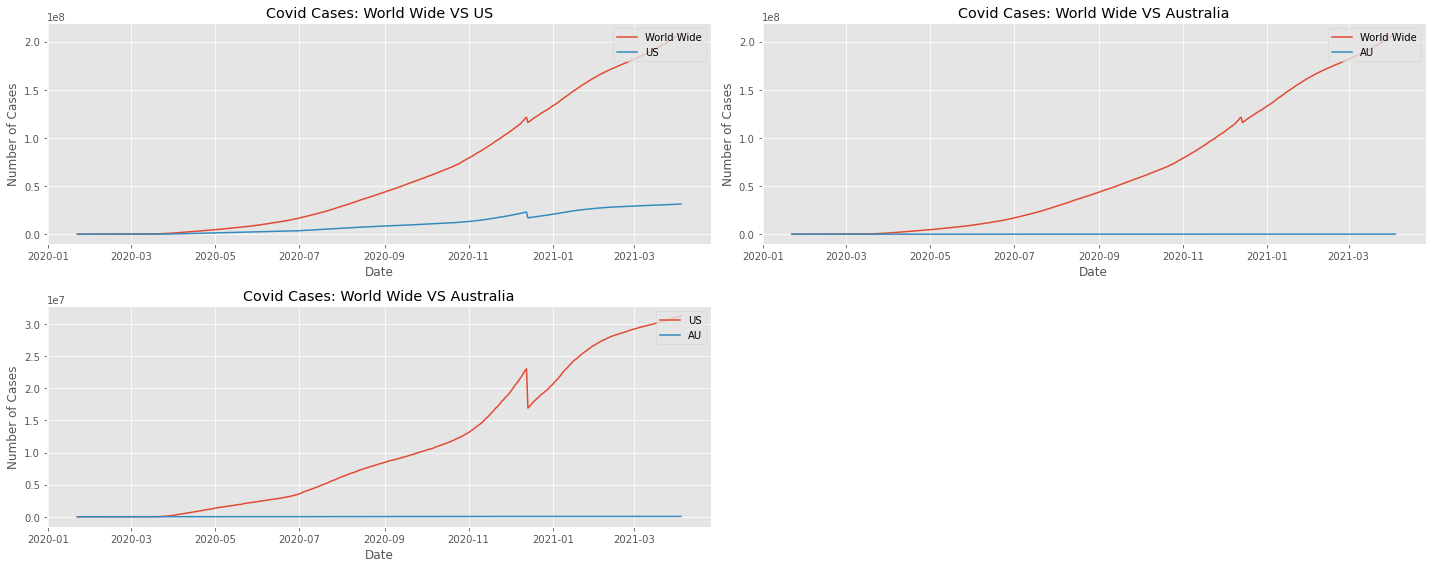

In [41]:
#Comparison of covid19 cases between world Wide, US and Australia

fig = plt.figure(figsize = (20,8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.plot(world_covid['Total Cases'], label = 'World Wide')
ax1.plot(us_df['Total Cases'], label = 'US')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Cases')
ax1.set_title('Covid Cases: World Wide VS US')


ax2.plot(world_covid['Total Cases'], label = 'World Wide')
ax2.plot(au_df['Total Cases'], label = 'AU')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Cases')
ax2.set_title('Covid Cases: World Wide VS Australia')


ax3.plot(us_df['Total Cases'], label = 'US')
ax3.plot(au_df['Total Cases'], label = 'AU')
ax3.set_xlabel('Date')
ax3.set_ylabel('Number of Cases')
ax3.set_title('Covid Cases: World Wide VS Australia')


ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right') 

fig.tight_layout()#To make the graph concise 
plt.show()

In [42]:
#Australia daily cases and death

au_daily = au_df.reset_index()

In [43]:
au_daily['Daily Confirmed Cases'] = au_daily['Total Cases'].sub(au_daily['Total Cases'].shift())
au_daily['Daily Deaths'] = au_daily['Deaths'].sub(au_daily['Deaths'].shift())
au_daily

,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed Cases,Daily Deaths
0,2020-01-22,0,0,0,0,NaN,NaN
1,2020-01-23,0,0,0,0,0.0,0.0
2,2020-01-24,0,0,0,0,0.0,0.0
3,2020-01-25,0,0,0,0,0.0,0.0
4,2020-01-26,4,0,0,4,4.0,0.0
...,...,...,...,...,...,...,...
434,2021-03-31,29322,23012,909,53243,25.0,0.0
435,2021-04-01,29333,23014,909,53256,13.0,0.0
436,2021-04-02,29341,23025,909,53275,19.0,0.0
437,2021-04-03,29348,23027,909,53284,9.0,0.0


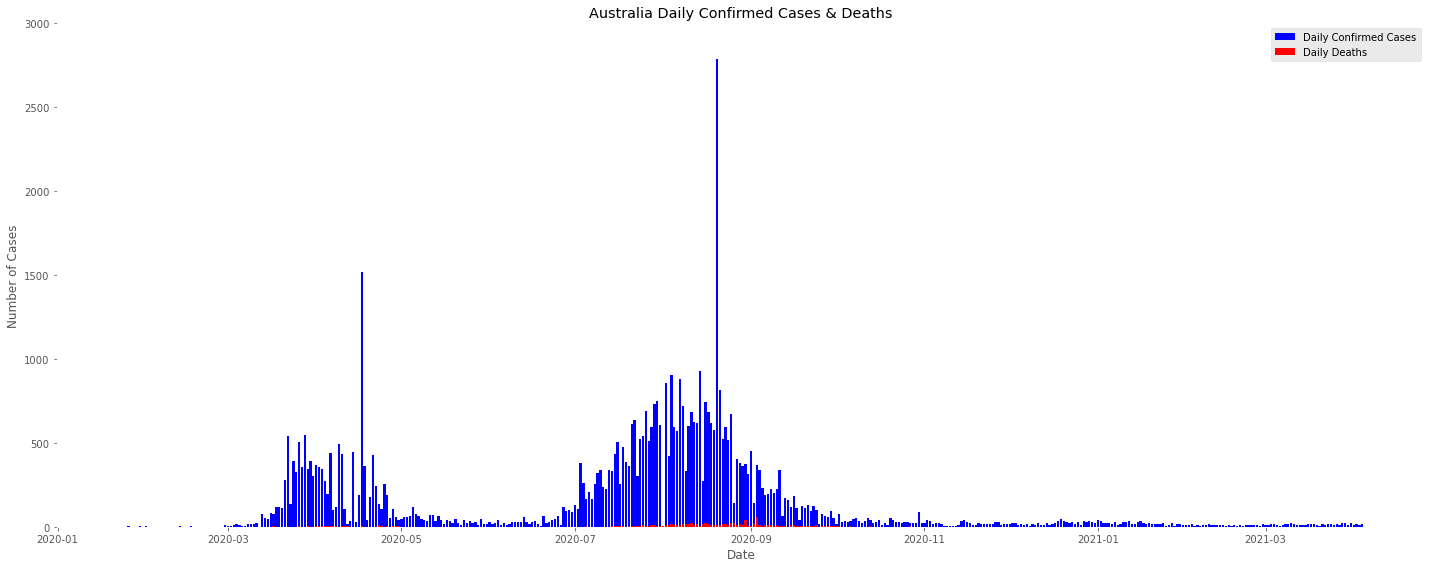

In [44]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111)
ax.set_ylim(0,3000)

ax.bar(au_daily['Date'], au_daily['Daily Confirmed Cases'], color = 'b', label = "Daily Confirmed Cases" )
ax.bar(au_daily['Date'], au_daily['Daily Deaths'], color = 'r', label = "Daily Deaths" )
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.set_title("Australia Daily Confirmed Cases & Deaths")
ax.set_facecolor('white')

plt.legend(loc = 'upper right')
fig.tight_layout()
plt.show()

In [96]:
#Covid19 Cases: Top 10 Countries VS Rest Of The World

yesterday = pd.to_datetime('today') - pd.Timedelta('1 days')#set the variable for yesterday
yesterday = yesterday.strftime("%Y-%m-%d") #set the variable for yesterday

today_df = df[df['Date']== yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending = False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending = False)[10:].sum()
top_10.loc['rest-of-world','Country'] = 'Rest of World'

In [97]:
top_10

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
78580,2021-04-04,US,30706126,0,555001,31261127
10535,2021-04-04,Brazil,12984956,11343607,331433,24659996
35119,2021-04-04,India,12485509,11629289,164623,24279421
27656,2021-04-04,France,4883174,306453,96808,5286435
62776,2021-04-04,Russia,4529576,4156141,98713,8784430
80336,2021-04-04,United Kingdom,4373798,13254,127078,4514130
37753,2021-04-04,Italy,3668264,2988199,111030,6767493
78141,2021-04-04,Turkey,3487050,3105350,32263,6624663
71556,2021-04-04,Spain,3300965,150376,75698,3527039
29412,2021-04-04,Germany,2896329,2585850,77060,5559239


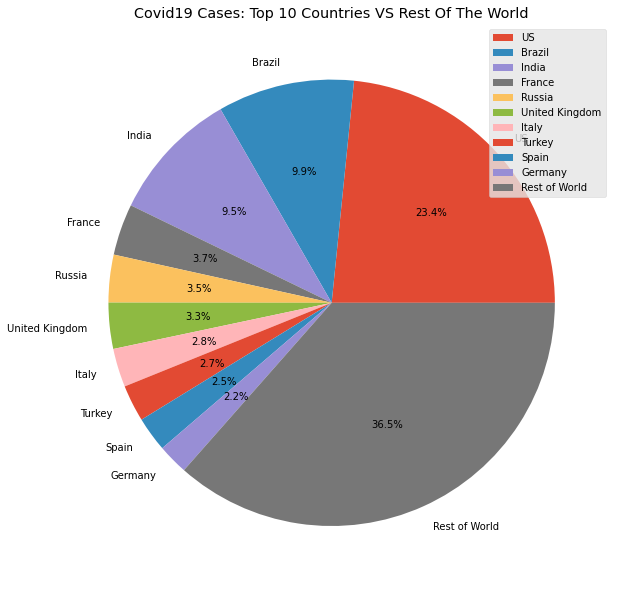

In [101]:
fig = plt.figure(figsize = (10,15))
ax_top10 = fig.add_subplot(111)

ax_top10.pie(top_10['Confirmed'], labels= top_10['Country'], autopct = '%1.1f%%')
ax_top10.set_title("Covid19 Cases: Top 10 Countries VS Rest Of The World")

plt.legend(loc = 'upper right')
plt.show()